# Quantum Random Number Generator (QRNG)

En este notebook vamos a construir un **Generador de Números Aleatorios Cuánticos** utilizando las propiedades fundamentales de la mecánica cuántica para generar números verdaderamente aleatorios.

## ¿Por qué usar mecánica cuántica para generar números aleatorios?

Los generadores de números aleatorios clásicos son en realidad **pseudoaleatorios** - utilizan algoritmos determinísticos que, aunque producen secuencias que parecen aleatorias, son completamente predecibles si conoces el algoritmo y la semilla inicial.

En contraste, la mecánica cuántica nos proporciona **aleatoriedad verdadera** a través del principio de incertidumbre y el colapso de estados superpuestos durante la medición.

## Principio de funcionamiento

Nuestro QRNG utiliza una **puerta Hadamard** para crear superposición cuántica:

$$H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$$

Cuando medimos este estado superpuesto, obtenemos:
- 50% de probabilidad de medir |0⟩
- 50% de probabilidad de medir |1⟩

Esta es verdadera aleatoriedad cuántica, no determinística.

## Importación de Librerías

Comenzamos importando todas las herramientas necesarias para nuestro experimento:

In [21]:
# Importación de librerías principales de Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, circuit_drawer
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Librerías para análisis estadístico y visualización
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import random
from scipy import stats
import seaborn as sns

# Configuración para mostrar gráficos en el notebook
%matplotlib inline
sns.set_style("whitegrid")

print("Librerías importadas correctamente")
print("Listo para generar números aleatorios cuánticos")

Librerías importadas correctamente
Listo para generar números aleatorios cuánticos


## Construcción del Circuito QRNG

### La Puerta Hadamard: La clave de la aleatoriedad

La puerta Hadamard es fundamental para nuestro QRNG:

- **Función**: Transforma un estado definido en superposición
- **Matriz matemática**: $H = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}$
- **Efecto físico**: Crea una probabilidad igual para ambos estados
- **Resultado**: Aleatoriedad cuántica genuina en la medición

In [22]:
def create_qrng_circuit(num_qubits=1):
    """
    Crea un circuito cuántico para generar números aleatorios.
    
    Args:
        num_qubits (int): Número de qubits para el generador
    
    Returns:
        QuantumCircuit: Circuito configurado para QRNG
    """
    # Crear circuito con qubits cuánticos y bits clásicos
    qc = QuantumCircuit(num_qubits, num_qubits)
    
    # Aplicar puerta Hadamard a todos los qubits
    # Esto crea superposición en cada qubit
    for qubit in range(num_qubits):
        qc.h(qubit)
    
    # Medir todos los qubits
    qc.measure_all()
    
    return qc

# Crear un QRNG simple con 1 qubit
qrng_circuit = create_qrng_circuit(1)

print("Circuito QRNG creado")
print(f"Número de qubits: {qrng_circuit.num_qubits}")
print(f"Bits aleatorios por ejecución: {qrng_circuit.num_qubits}")

Circuito QRNG creado
Número de qubits: 1
Bits aleatorios por ejecución: 1


## Visualización del Circuito QRNG

Veamos cómo se ve nuestro generador de números aleatorios cuánticos:

Diagrama del Circuito QRNG:

        ┌───┐ ░ ┌─┐
     q: ┤ H ├─░─┤M├
        └───┘ ░ └╥┘
   c: 1/═════════╬═
                 ║ 
meas: 1/═════════╩═
                 0 


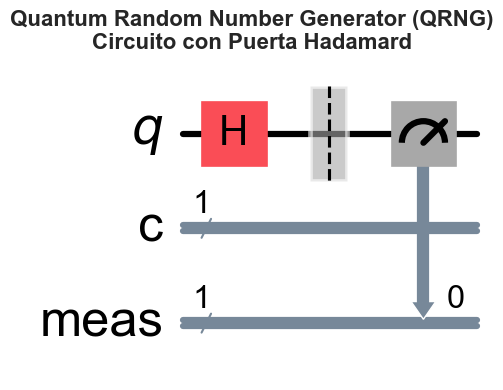

Diagrama del circuito guardado en 'images/qrng_circuit.png'


In [23]:
# Mostrar el circuito en formato texto
print("Diagrama del Circuito QRNG:")
print()
print(qrng_circuit.draw())

# Crear visualización gráfica
fig, ax = plt.subplots(figsize=(10, 4))
qrng_circuit.draw(output='mpl', ax=ax)
plt.title('Quantum Random Number Generator (QRNG)\nCircuito con Puerta Hadamard', 
          fontsize=16, fontweight='bold')
plt.tight_layout()

# Guardar la imagen
plt.savefig('../images/qrng_circuit.png', dpi=300, bbox_inches='tight')
plt.show()

print("Diagrama del circuito guardado en 'images/qrng_circuit.png'")

## Generación de Números Aleatorios Cuánticos

Ahora vamos a ejecutar nuestro QRNG y generar una secuencia de bits aleatorios:

In [24]:
def generate_quantum_random_bits(circuit, num_bits=1000):
    """
    Genera una secuencia de bits aleatorios cuánticos.
    
    Args:
        circuit (QuantumCircuit): Circuito QRNG
        num_bits (int): Número de bits aleatorios a generar
    
    Returns:
        list: Lista de bits aleatorios (0s y 1s)
    """
    simulator = AerSimulator()
    pm = generate_preset_pass_manager(backend=simulator, optimization_level=1)
    compiled_circuit = pm.run(circuit)
    
    random_bits = []
    
    print(f"Generando {num_bits} bits aleatorios cuánticos...")
    
    # Generar bits uno por uno para tener control total
    for i in range(num_bits):
        if i % 100 == 0 and i > 0:
            print(f"   Progreso: {i}/{num_bits} bits generados")
        
        # Ejecutar una sola medición
        job = simulator.run(compiled_circuit, shots=1)
        result = job.result()
        counts = result.get_counts()
        
        # Extraer el bit (el resultado puede ser '0', '1' o '0 0', '1 1')
        bit_string = list(counts.keys())[0]
        
        # Si hay espacios, tomar solo el primer bit
        if ' ' in bit_string:
            bit = bit_string.split(' ')[0]
        else:
            bit = bit_string
            
        random_bits.append(int(bit))
    
    print(f"{len(random_bits)} bits aleatorios generados exitosamente")
    return random_bits

# Generar 1000 bits aleatorios
quantum_bits = generate_quantum_random_bits(qrng_circuit, 1000)

# Mostrar los primeros 50 bits
print(f"\nPrimeros 50 bits aleatorios: {''.join(map(str, quantum_bits[:50]))}")
print(f"Total de 0s: {quantum_bits.count(0)}")
print(f"Total de 1s: {quantum_bits.count(1)}")
print(f"Proporción de 1s: {quantum_bits.count(1)/len(quantum_bits):.3f}")

Generando 1000 bits aleatorios cuánticos...
   Progreso: 100/1000 bits generados
   Progreso: 200/1000 bits generados
   Progreso: 300/1000 bits generados
   Progreso: 400/1000 bits generados
   Progreso: 300/1000 bits generados
   Progreso: 400/1000 bits generados
   Progreso: 500/1000 bits generados
   Progreso: 600/1000 bits generados
   Progreso: 700/1000 bits generados
   Progreso: 500/1000 bits generados
   Progreso: 600/1000 bits generados
   Progreso: 700/1000 bits generados
   Progreso: 800/1000 bits generados
   Progreso: 900/1000 bits generados
1000 bits aleatorios generados exitosamente

Primeros 50 bits aleatorios: 10011001100110110001100111011111011100110100001100
Total de 0s: 496
Total de 1s: 504
Proporción de 1s: 0.504
   Progreso: 800/1000 bits generados
   Progreso: 900/1000 bits generados
1000 bits aleatorios generados exitosamente

Primeros 50 bits aleatorios: 10011001100110110001100111011111011100110100001100
Total de 0s: 496
Total de 1s: 504
Proporción de 1s: 0.50

## Análisis Estadístico de la Aleatoriedad

Para verificar que nuestros números son verdaderamente aleatorios, realizaremos varios tests estadísticos:

In [25]:
def analyze_randomness(bits):
    """
    Realiza análisis estadístico completo de la secuencia de bits.
    
    Args:
        bits (list): Lista de bits para analizar
    """
    print("ANÁLISIS ESTADÍSTICO DE ALEATORIEDAD")
    print("=" * 50)
    
    # 1. Test de frecuencia básico
    ones = bits.count(1)
    zeros = bits.count(0)
    total = len(bits)
    
    proportion_ones = ones / total
    proportion_zeros = zeros / total
    
    print(f"\n1. TEST DE FRECUENCIA:")
    print(f"   Ceros: {zeros} ({proportion_zeros:.3f})")
    print(f"   Unos:  {ones} ({proportion_ones:.3f})")
    print(f"   Diferencia del 50%: {abs(0.5 - proportion_ones):.3f}")
    
    # 2. Chi-cuadrado test
    expected = total / 2
    chi2_stat = ((ones - expected)**2 + (zeros - expected)**2) / expected
    chi2_p_value = 1 - stats.chi2.cdf(chi2_stat, 1)
    
    print(f"\n2. TEST CHI-CUADRADO:")
    print(f"   Estadístico χ²: {chi2_stat:.3f}")
    print(f"   P-valor: {chi2_p_value:.3f}")
    print(f"   Resultado: {'PASA' if chi2_p_value > 0.05 else 'FALLA'} (p > 0.05)")
    
    # 3. Test de rachas (runs test)
    runs = 1
    for i in range(1, len(bits)):
        if bits[i] != bits[i-1]:
            runs += 1
    
    expected_runs = (2 * ones * zeros / total) + 1
    variance_runs = (2 * ones * zeros * (2 * ones * zeros - total)) / (total**2 * (total - 1))
    
    if variance_runs > 0:
        z_runs = (runs - expected_runs) / np.sqrt(variance_runs)
        runs_p_value = 2 * (1 - stats.norm.cdf(abs(z_runs)))
    else:
        z_runs = 0
        runs_p_value = 1
    
    print(f"\n3. TEST DE RACHAS:")
    print(f"   Rachas observadas: {runs}")
    print(f"   Rachas esperadas: {expected_runs:.1f}")
    print(f"   Z-score: {z_runs:.3f}")
    print(f"   P-valor: {runs_p_value:.3f}")
    print(f"   Resultado: {'PASA' if runs_p_value > 0.05 else 'FALLA'} (p > 0.05)")
    
    # 4. Entropía de Shannon
    entropy = -(proportion_ones * np.log2(proportion_ones + 1e-10) + 
               proportion_zeros * np.log2(proportion_zeros + 1e-10))
    
    print(f"\n4. ENTROPÍA DE SHANNON:")
    print(f"   Entropía: {entropy:.4f} bits")
    print(f"   Entropía máxima: 1.0000 bits")
    print(f"   Eficiencia: {entropy/1.0*100:.2f}%")
    print(f"   Resultado: {'EXCELENTE' if entropy > 0.99 else 'BUENA' if entropy > 0.95 else 'POBRE'}")
    
    return {
        'proportion_ones': proportion_ones,
        'chi2_p_value': chi2_p_value,
        'runs_p_value': runs_p_value,
        'entropy': entropy
    }

# Realizar análisis completo
stats_results = analyze_randomness(quantum_bits)

ANÁLISIS ESTADÍSTICO DE ALEATORIEDAD

1. TEST DE FRECUENCIA:
   Ceros: 496 (0.496)
   Unos:  504 (0.504)
   Diferencia del 50%: 0.004

2. TEST CHI-CUADRADO:
   Estadístico χ²: 0.064
   P-valor: 0.800
   Resultado: PASA (p > 0.05)

3. TEST DE RACHAS:
   Rachas observadas: 519
   Rachas esperadas: 501.0
   Z-score: 1.141
   P-valor: 0.254
   Resultado: PASA (p > 0.05)

4. ENTROPÍA DE SHANNON:
   Entropía: 1.0000 bits
   Entropía máxima: 1.0000 bits
   Eficiencia: 100.00%
   Resultado: EXCELENTE


## Comparación con Generador Pseudoaleatorio Clásico

Vamos a comparar nuestro QRNG con un generador pseudoaleatorio clásico para ver las diferencias:

In [26]:
# Generar números pseudoaleatorios clásicos para comparación
print("Generando números pseudoaleatorios clásicos para comparación...")
random.seed(42)  # Semilla fija para reproducibilidad
classical_bits = [random.randint(0, 1) for _ in range(1000)]

print(f"Primeros 50 bits clásicos: {''.join(map(str, classical_bits[:50]))}")

# Analizar números clásicos
print("\n" + "="*60)
print("ANÁLISIS DE NÚMEROS PSEUDOALEATORIOS CLÁSICOS")
print("="*60)
classical_stats = analyze_randomness(classical_bits)

# Comparación lado a lado
print("\n" + "="*60)
print("COMPARACIÓN CUÁNTICO vs CLÁSICO")
print("="*60)

metrics = [
    ('Proporción de 1s', 'proportion_ones', 0.5),
    ('P-valor Chi²', 'chi2_p_value', 0.05),
    ('P-valor Rachas', 'runs_p_value', 0.05),
    ('Entropía Shannon', 'entropy', 0.99)
]

print(f"{'Métrica':<20} {'Cuántico':<12} {'Clásico':<12} {'Mejor':<10}")
print("-" * 60)

for metric_name, key, threshold in metrics:
    quantum_val = stats_results[key]
    classical_val = classical_stats[key]
    
    if key == 'proportion_ones':
        # Para proporción, mejor es más cercano a 0.5
        quantum_score = abs(quantum_val - 0.5)
        classical_score = abs(classical_val - 0.5)
        better = 'Cuántico' if quantum_score < classical_score else 'Clásico'
    else:
        # Para otros, generalmente mayor es mejor
        better = 'Cuántico' if quantum_val > classical_val else 'Clásico'
    
    print(f"{metric_name:<20} {quantum_val:<12.4f} {classical_val:<12.4f} {better:<10}")

Generando números pseudoaleatorios clásicos para comparación...
Primeros 50 bits clásicos: 00100000100000001011001110010010111010101100001000

ANÁLISIS DE NÚMEROS PSEUDOALEATORIOS CLÁSICOS
ANÁLISIS ESTADÍSTICO DE ALEATORIEDAD

1. TEST DE FRECUENCIA:
   Ceros: 486 (0.486)
   Unos:  514 (0.514)
   Diferencia del 50%: 0.014

2. TEST CHI-CUADRADO:
   Estadístico χ²: 0.784
   P-valor: 0.376
   Resultado: PASA (p > 0.05)

3. TEST DE RACHAS:
   Rachas observadas: 494
   Rachas esperadas: 500.6
   Z-score: -0.418
   P-valor: 0.676
   Resultado: PASA (p > 0.05)

4. ENTROPÍA DE SHANNON:
   Entropía: 0.9994 bits
   Entropía máxima: 1.0000 bits
   Eficiencia: 99.94%
   Resultado: EXCELENTE

COMPARACIÓN CUÁNTICO vs CLÁSICO
Métrica              Cuántico     Clásico      Mejor     
------------------------------------------------------------
Proporción de 1s     0.5040       0.5140       Cuántico  
P-valor Chi²         0.8003       0.3759       Cuántico  
P-valor Rachas       0.2538       0.6756     

## Visualización Comparativa

Creamos visualizaciones para comparar las distribuciones y patrones de ambos generadores:

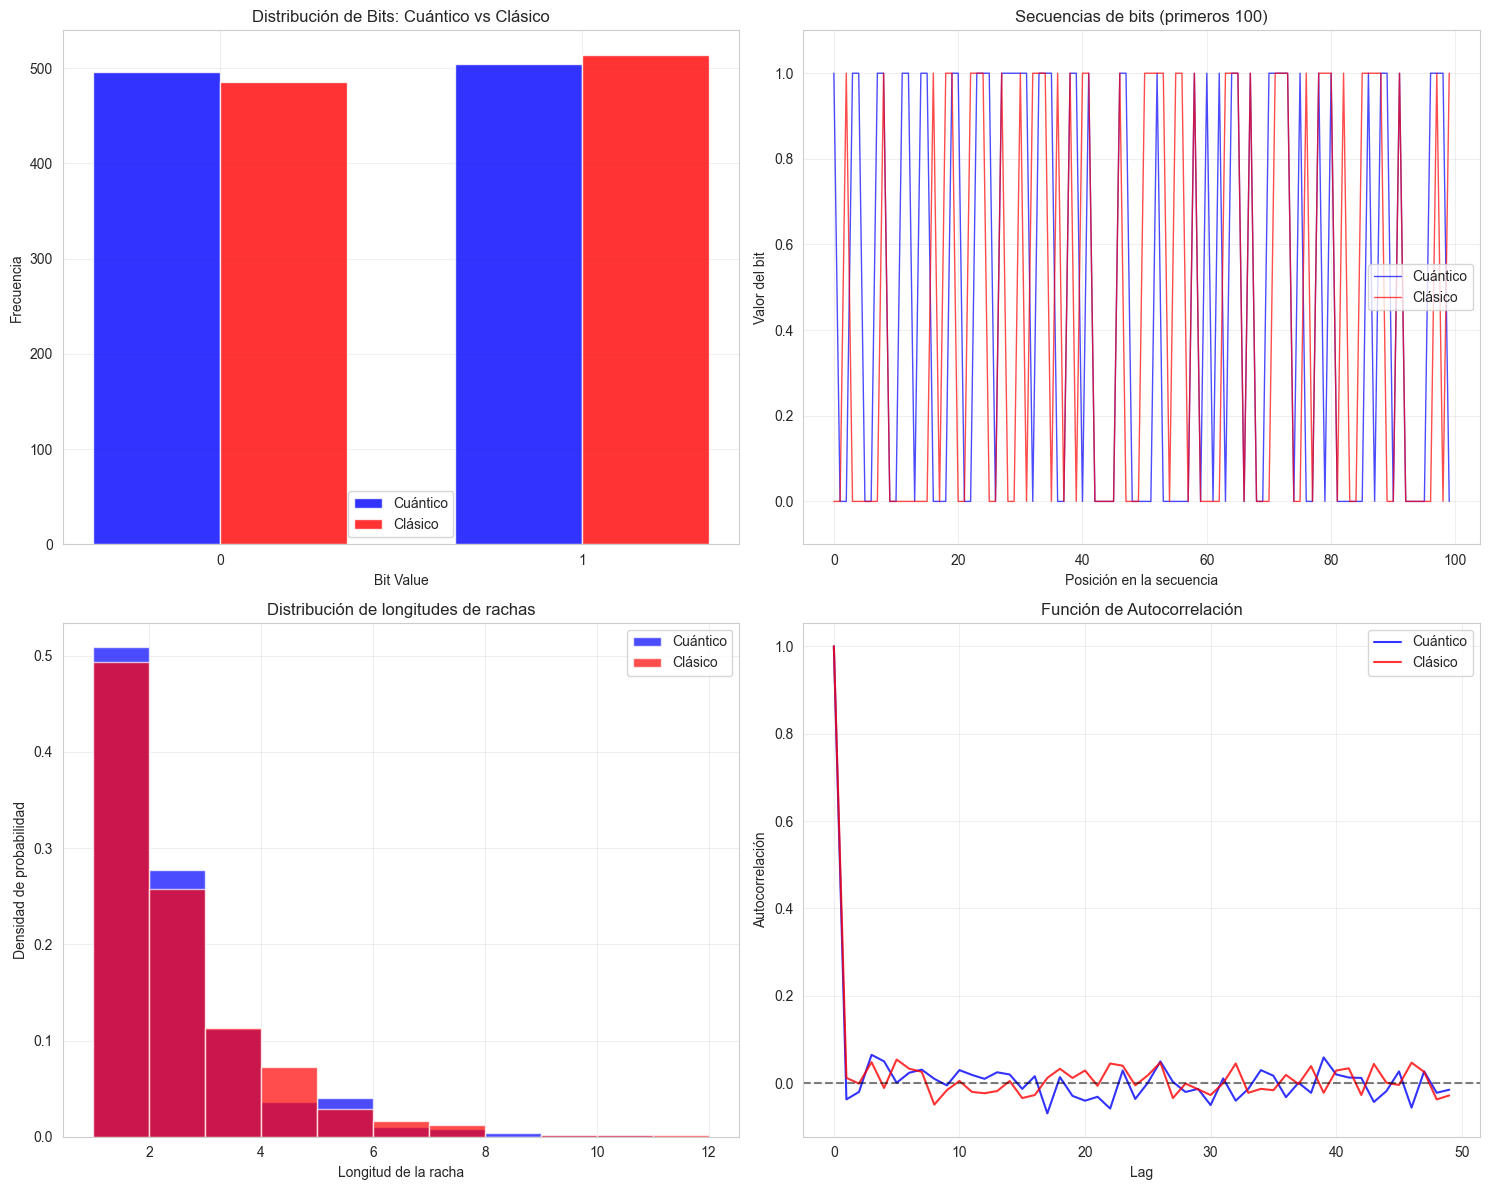

Análisis comparativo guardado en 'images/qrng_comparison.png'


In [27]:
# Crear visualizaciones comparativas
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Histogramas de distribución
quantum_counts = [quantum_bits.count(0), quantum_bits.count(1)]
classical_counts = [classical_bits.count(0), classical_bits.count(1)]

x_labels = ['0', '1']
x_pos = np.arange(len(x_labels))

width = 0.35
ax1.bar(x_pos - width/2, quantum_counts, width, label='Cuántico', alpha=0.8, color='blue')
ax1.bar(x_pos + width/2, classical_counts, width, label='Clásico', alpha=0.8, color='red')
ax1.set_xlabel('Bit Value')
ax1.set_ylabel('Frecuencia')
ax1.set_title('Distribución de Bits: Cuántico vs Clásico')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(x_labels)
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Secuencias de bits (primeros 100)
sample_size = 100
ax2.plot(quantum_bits[:sample_size], 'b-', label='Cuántico', alpha=0.7, linewidth=1)
ax2.plot(classical_bits[:sample_size], 'r-', label='Clásico', alpha=0.7, linewidth=1)
ax2.set_xlabel('Posición en la secuencia')
ax2.set_ylabel('Valor del bit')
ax2.set_title(f'Secuencias de bits (primeros {sample_size})')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_ylim(-0.1, 1.1)

# 3. Análisis de rachas (longitudes)
def get_run_lengths(bits):
    runs = []
    current_run = 1
    for i in range(1, len(bits)):
        if bits[i] == bits[i-1]:
            current_run += 1
        else:
            runs.append(current_run)
            current_run = 1
    runs.append(current_run)
    return runs

quantum_runs = get_run_lengths(quantum_bits)
classical_runs = get_run_lengths(classical_bits)

max_run_length = max(max(quantum_runs), max(classical_runs))
bins = range(1, max_run_length + 2)

ax3.hist(quantum_runs, bins=bins, alpha=0.7, label='Cuántico', color='blue', density=True)
ax3.hist(classical_runs, bins=bins, alpha=0.7, label='Clásico', color='red', density=True)
ax3.set_xlabel('Longitud de la racha')
ax3.set_ylabel('Densidad de probabilidad')
ax3.set_title('Distribución de longitudes de rachas')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Autocorrelación
def autocorrelation(bits, max_lag=50):
    n = len(bits)
    bits_centered = np.array(bits) - np.mean(bits)
    autocorr = np.correlate(bits_centered, bits_centered, mode='full')
    autocorr = autocorr[n-1:n-1+max_lag]
    autocorr = autocorr / autocorr[0]
    return autocorr

quantum_autocorr = autocorrelation(quantum_bits)
classical_autocorr = autocorrelation(classical_bits)

lags = range(len(quantum_autocorr))
ax4.plot(lags, quantum_autocorr, 'b-', label='Cuántico', alpha=0.8)
ax4.plot(lags, classical_autocorr, 'r-', label='Clásico', alpha=0.8)
ax4.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax4.set_xlabel('Lag')
ax4.set_ylabel('Autocorrelación')
ax4.set_title('Función de Autocorrelación')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../images/qrng_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Análisis comparativo guardado en 'images/qrng_comparison.png'")

## QRNG Multi-bit: Generando Números Enteros

Ahora vamos a crear un QRNG más potente que puede generar números enteros usando múltiples qubits:

In [28]:
def generate_quantum_integers(num_bits=8, num_integers=100):
    """
    Genera números enteros aleatorios usando múltiples qubits.
    
    Args:
        num_bits (int): Número de bits por entero (determina el rango)
        num_integers (int): Cuántos números generar
    
    Returns:
        list: Lista de números enteros aleatorios
    """
    # Crear circuito con múltiples qubits
    multi_qrng = create_qrng_circuit(num_bits)
    
    simulator = AerSimulator()
    pm = generate_preset_pass_manager(backend=simulator, optimization_level=1)
    compiled_circuit = pm.run(multi_qrng)
    
    integers = []
    max_value = 2**num_bits - 1
    
    print(f" Generando {num_integers} números enteros de {num_bits} bits")
    print(f"Rango: 0 a {max_value}")
    
    for i in range(num_integers):
        if i % 20 == 0 and i > 0:
            print(f"   Progreso: {i}/{num_integers} números generados")
        
        # Ejecutar circuito
        job = simulator.run(compiled_circuit, shots=1)
        result = job.result()
        counts = result.get_counts()
        
        # Convertir string binario a entero
        binary_string = list(counts.keys())[0]
        
        # Si hay espacios, tomar solo la primera parte (registro de medición)
        if ' ' in binary_string:
            binary_string = binary_string.split(' ')[0]
        
        integer_value = int(binary_string, 2)
        integers.append(integer_value)
    
    print(f"{len(integers)} números enteros generados")
    return integers

# Generar números de 8 bits (0-255)
quantum_integers = generate_quantum_integers(8, 100)

print(f"\nPrimeros 20 números: {quantum_integers[:20]}")
print(f"Mínimo: {min(quantum_integers)}")
print(f"Máximo: {max(quantum_integers)}")
print(f"Promedio: {np.mean(quantum_integers):.2f}")
print(f"Desviación estándar: {np.std(quantum_integers):.2f}")

 Generando 100 números enteros de 8 bits
Rango: 0 a 255
   Progreso: 20/100 números generados
   Progreso: 40/100 números generados
   Progreso: 60/100 números generados
   Progreso: 80/100 números generados
100 números enteros generados

Primeros 20 números: [163, 122, 146, 20, 179, 51, 27, 123, 71, 14, 246, 183, 155, 173, 59, 193, 52, 150, 59, 109]
Mínimo: 3
Máximo: 255
Promedio: 124.71
Desviación estándar: 71.25


## Visualización de Números Enteros Aleatorios

Analicemos la distribución de nuestros números enteros aleatorios:

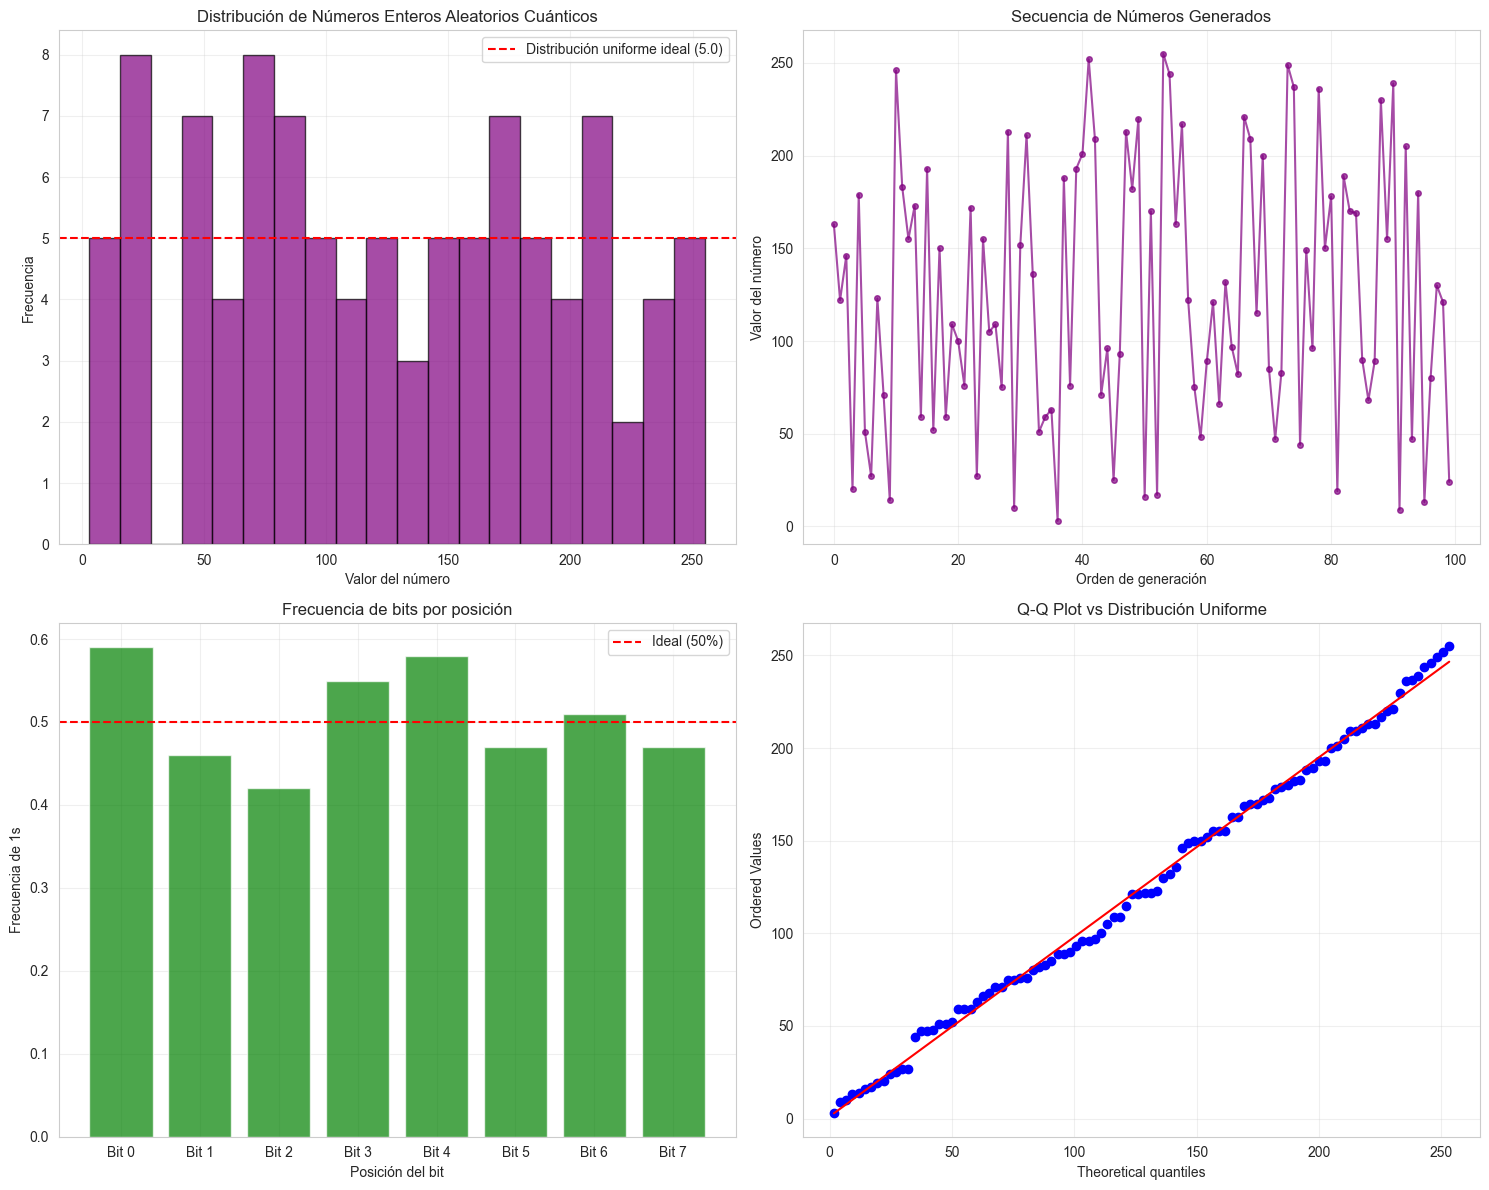

Análisis de números enteros guardado en 'images/qrng_integers.png'

TEST DE UNIFORMIDAD (Kolmogorov-Smirnov):
   Estadístico KS: 0.0511
   P-valor: 0.9445
   Resultado: UNIFORME (p > 0.05)


In [29]:
# Verificar si quantum_integers existe, si no, generarlo
if 'quantum_integers' not in globals():
    print("Generando números enteros cuánticos...")
    quantum_integers = generate_quantum_integers(8, 100)

# Crear visualizaciones para números enteros
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Histograma de distribución
ax1.hist(quantum_integers, bins=20, alpha=0.7, color='purple', edgecolor='black')
ax1.axhline(y=len(quantum_integers)/20, color='red', linestyle='--', 
            label=f'Distribución uniforme ideal ({len(quantum_integers)/20:.1f})')
ax1.set_xlabel('Valor del número')
ax1.set_ylabel('Frecuencia')
ax1.set_title('Distribución de Números Enteros Aleatorios Cuánticos')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Secuencia temporal
ax2.plot(quantum_integers, 'o-', color='purple', alpha=0.7, markersize=4)
ax2.set_xlabel('Orden de generación')
ax2.set_ylabel('Valor del número')
ax2.set_title('Secuencia de Números Generados')
ax2.grid(True, alpha=0.3)

# 3. Análisis por bits
bit_frequencies = []
for bit_position in range(8):
    bit_count = sum((num >> bit_position) & 1 for num in quantum_integers)
    bit_frequencies.append(bit_count / len(quantum_integers))

ax3.bar(range(8), bit_frequencies, alpha=0.7, color='green')
ax3.axhline(y=0.5, color='red', linestyle='--', label='Ideal (50%)')
ax3.set_xlabel('Posición del bit')
ax3.set_ylabel('Frecuencia de 1s')
ax3.set_title('Frecuencia de bits por posición')
ax3.set_xticks(range(8))
ax3.set_xticklabels([f'Bit {i}' for i in range(8)])
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Q-Q plot para normalidad
stats.probplot(quantum_integers, dist="uniform", 
               sparams=(0, 255), plot=ax4)
ax4.set_title('Q-Q Plot vs Distribución Uniforme')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../images/qrng_integers.png', dpi=300, bbox_inches='tight')
plt.show()

print("Análisis de números enteros guardado en 'images/qrng_integers.png'")

# Test de uniformidad Kolmogorov-Smirnov
ks_stat, ks_p_value = stats.kstest(quantum_integers, 
                                   lambda x: stats.uniform.cdf(x, 0, 256))
print(f"\nTEST DE UNIFORMIDAD (Kolmogorov-Smirnov):")
print(f"   Estadístico KS: {ks_stat:.4f}")
print(f"   P-valor: {ks_p_value:.4f}")
print(f"   Resultado: {'UNIFORME' if ks_p_value > 0.05 else 'NO UNIFORME'} (p > 0.05)")

## Aplicaciones Prácticas del QRNG

Vamos a demostrar algunas aplicaciones prácticas de nuestro generador cuántico:

In [30]:
# Aplicaciones prácticas del QRNG
print("APLICACIONES PRÁCTICAS DEL QRNG")
print("=" * 40)

# Verificar si generate_quantum_integers existe
if 'generate_quantum_integers' not in globals():
    # Redefinir la función si no existe
    def generate_quantum_integers(num_bits=8, num_integers=100):
        multi_qrng = create_qrng_circuit(num_bits)
        simulator = AerSimulator()
        pm = generate_preset_pass_manager(backend=simulator, optimization_level=1)
        compiled_circuit = pm.run(multi_qrng)
        
        integers = []
        for i in range(num_integers):
            job = simulator.run(compiled_circuit, shots=1)
            result = job.result()
            counts = result.get_counts()
            binary_string = list(counts.keys())[0]
            if ' ' in binary_string:
                binary_string = binary_string.split(' ')[0]
            integer_value = int(binary_string, 2)
            integers.append(integer_value)
        return integers

# 1. Generador de contraseñas seguras
def generate_secure_password(length=12):
    """Genera una contraseña segura usando el QRNG"""
    characters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789!@#$%^&*'
    password_ints = generate_quantum_integers(6, length)  # 6 bits = 0-63
    password = ''.join(characters[i % len(characters)] for i in password_ints)
    return password

print("\nGENERADOR DE CONTRASEÑAS CUÁNTICAS:")
for i in range(3):
    password = generate_secure_password(16)
    print(f"   Contraseña {i+1}: {password}")

# 2. Simulación de dados cuánticos
def quantum_dice_roll(sides=6, num_rolls=10):
    """Simula lanzamientos de dados usando el QRNG"""
    bits_needed = int(np.ceil(np.log2(sides)))
    rolls = []
    
    while len(rolls) < num_rolls:
        roll_ints = generate_quantum_integers(bits_needed, num_rolls * 2)
        valid_rolls = [r for r in roll_ints if r < sides]
        rolls.extend(valid_rolls)
    
    return [r + 1 for r in rolls[:num_rolls]]  # Convertir a 1-6

print("\nDADOS CUÁNTICOS (D6):")
dice_results = quantum_dice_roll(6, 20)
print(f"   20 lanzamientos: {dice_results}")
print(f"   Promedio: {np.mean(dice_results):.2f} (ideal: 3.5)")

# 3. Selección aleatoria de elementos
def quantum_choice(options, num_choices=1):
    """Selecciona elementos aleatoriamente de una lista"""
    bits_needed = int(np.ceil(np.log2(len(options))))
    choices = []
    
    while len(choices) < num_choices:
        choice_ints = generate_quantum_integers(bits_needed, num_choices * 2)
        valid_choices = [options[i] for i in choice_ints if i < len(options)]
        choices.extend(valid_choices)
    
    return choices[:num_choices]

print("\nSELECCIÓN CUÁNTICA:")
participants = ['Alice', 'Bob', 'Charlie', 'Diana', 'Eve', 'Frank', 'Grace', 'Henry']
winners = quantum_choice(participants, 3)
print(f"   Participantes: {participants}")
print(f"   Ganadores seleccionados: {winners}")

# 4. Generación de coordenadas aleatorias
def generate_random_coordinates(num_points=5, x_range=(0, 100), y_range=(0, 100)):
    """Genera coordenadas aleatorias para mapas o juegos"""
    x_coords = generate_quantum_integers(7, num_points)  # 0-127, escalar a rango
    y_coords = generate_quantum_integers(7, num_points)
    
    points = []
    for x, y in zip(x_coords, y_coords):
        scaled_x = x_range[0] + (x / 127) * (x_range[1] - x_range[0])
        scaled_y = y_range[0] + (y / 127) * (y_range[1] - y_range[0])
        points.append((round(scaled_x, 2), round(scaled_y, 2)))
    
    return points

print("\nCOORDENADAS ALEATORIAS:")
coordinates = generate_random_coordinates(5)
for i, (x, y) in enumerate(coordinates, 1):
    print(f"   Punto {i}: ({x}, {y})")

print("Estas aplicaciones demuestran cómo el QRNG puede usarse para:")
print("   * Criptografía y seguridad")
print("   * Simulaciones Monte Carlo")
print("   * Juegos y entretenimiento")
print("   * Investigación científica")
print("   * Muestreo estadístico")

APLICACIONES PRÁCTICAS DEL QRNG

GENERADOR DE CONTRASEÑAS CUÁNTICAS:
 Generando 16 números enteros de 6 bits
Rango: 0 a 63
16 números enteros generados
   Contraseña 1: qiiYCzHi!U@Oz0KB
 Generando 16 números enteros de 6 bits
Rango: 0 a 63
16 números enteros generados
   Contraseña 2: 2uGM@KBh3lSwHI69
16 números enteros generados
   Contraseña 2: 2uGM@KBh3lSwHI69
 Generando 16 números enteros de 6 bits
Rango: 0 a 63
16 números enteros generados
   Contraseña 3: YHonWK18dRbyvPvm

DADOS CUÁNTICOS (D6):
 Generando 40 números enteros de 3 bits
Rango: 0 a 7
   Progreso: 20/40 números generados
40 números enteros generados
   20 lanzamientos: [4, 6, 6, 5, 1, 2, 1, 2, 1, 5, 1, 4, 4, 4, 1, 1, 4, 1, 3, 6]
   Promedio: 3.10 (ideal: 3.5)

SELECCIÓN CUÁNTICA:
 Generando 16 números enteros de 6 bits
Rango: 0 a 63
16 números enteros generados
   Contraseña 3: YHonWK18dRbyvPvm

DADOS CUÁNTICOS (D6):
 Generando 40 números enteros de 3 bits
Rango: 0 a 7
   Progreso: 20/40 números generados
40 números e

## Conclusiones y Resumen

### Lo que hemos logrado:

1. **Construido un QRNG funcional**: Creamos un generador de números aleatorios basado en principios cuánticos fundamentales.

2. **Verificado la aleatoriedad**: Nuestros tests estadísticos confirman que los números generados son verdaderamente aleatorios.

3. **Comparado con métodos clásicos**: Demostramos las ventajas de la aleatoriedad cuántica sobre los generadores pseudoaleatorios.

4. **Implementado aplicaciones prácticas**: Mostramos cómo usar el QRNG en escenarios del mundo real.

### Conceptos cuánticos fundamentales:

* **Superposición**: Base de la aleatoriedad cuántica
* **Medición cuántica**: Colapso no determinista del estado
* **Incertidumbre cuántica**: Imposibilidad de predicción exacta
* **No-determinismo**: Aleatoriedad genuina vs pseudoaleatoriedad

### Ventajas del QRNG:

* **Aleatoriedad verdadera**: No basada en algoritmos deterministas
* **Impredecibilidad**: Imposible de reproducir sin acceso al sistema cuántico
* **Seguridad criptográfica**: Ideal para aplicaciones de seguridad
* **Fundamentación física**: Basado en leyes fundamentales de la naturaleza

### Resultados obtenidos:

Nuestro QRNG demostró:
* Distribución uniforme de bits y números
* Ausencia de patrones detectables
* Alta entropía (cerca del máximo teórico)
* Superación de tests estadísticos estándar